<a href="https://colab.research.google.com/github/iqbalamo93/kerasTF/blob/master/Neural_Net_Keras_Linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Data_Tf_Udemy/kc_house_data.csv')

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


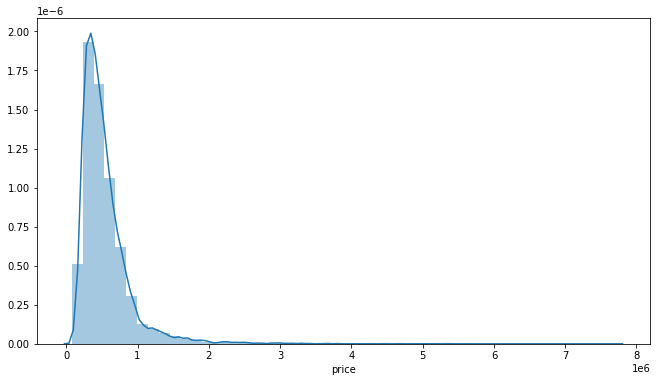

In [15]:
plt.figure(figsize=(11,6))
sns.distplot(df['price'])

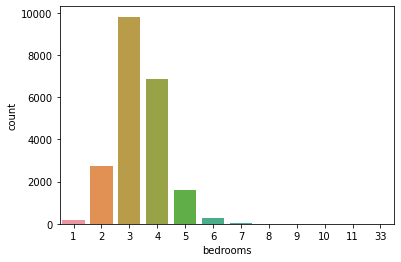

In [10]:
sns.countplot(df['bedrooms'])

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

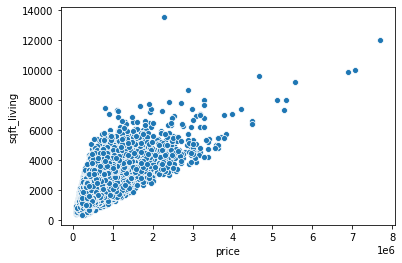

In [13]:
sns.scatterplot(x='price',y='sqft_living',data=df)

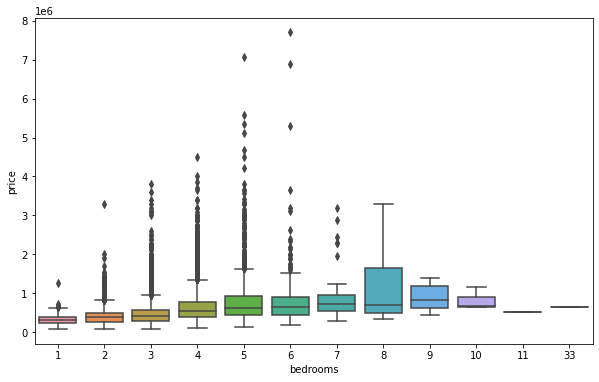

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

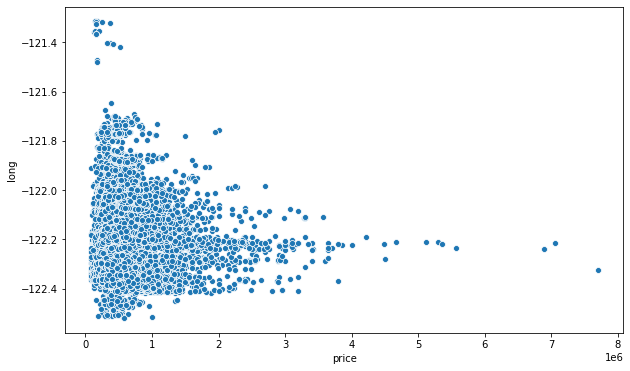

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)

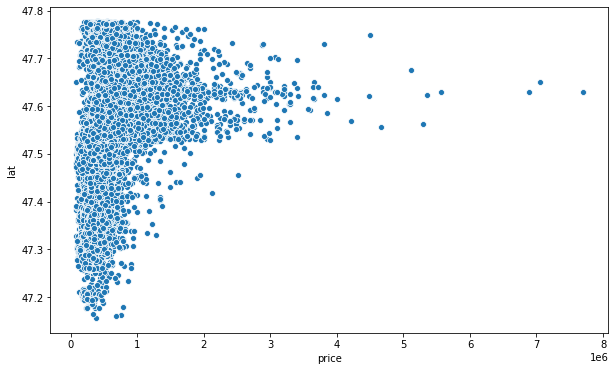

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)

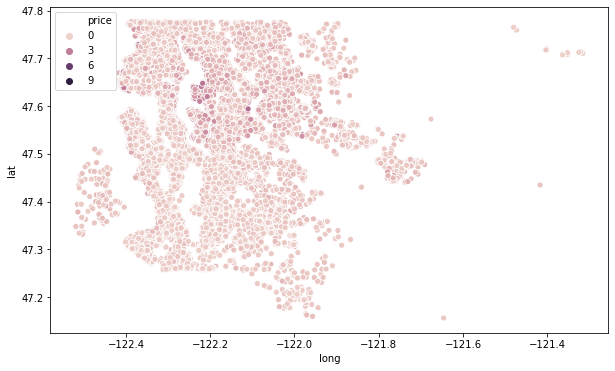

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [25]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [26]:
len(df)*0.01

215.97

In [0]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:]

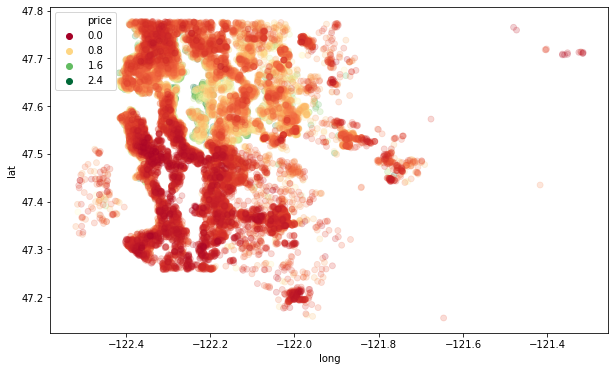

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

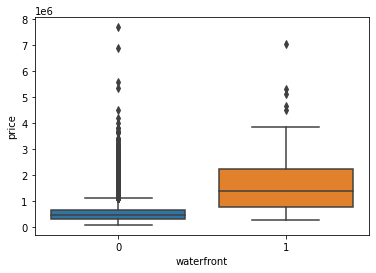

In [33]:
sns.boxplot(x='waterfront',y='price',data=df)

In [0]:
df.drop('id',inplace=True,axis=1)

In [0]:
df['date']=pd.to_datetime(df['date'])

In [0]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

In [42]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


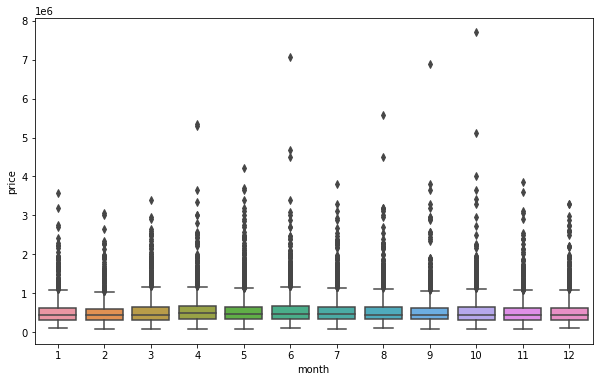

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

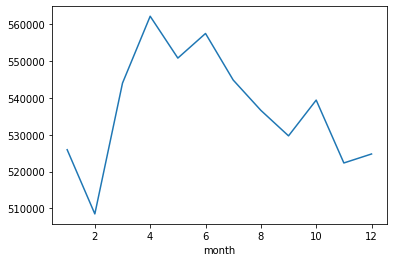

In [46]:
df.groupby('month').mean()['price'].plot()

In [47]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [49]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [0]:
df.drop('zipcode',axis=1,inplace=True)

In [51]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [0]:
X= df.drop(['price','date'],axis=1).values
y= df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler =MinMaxScaler()

In [0]:
X_train= scaler.fit_transform(X_train)

In [0]:
X_test=scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model=Sequential()

In [81]:
X_train.shape

(15117, 19)

In [0]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [86]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 79939526656.0000 - val_loss: 71288438784.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 67817947136.0000 - val_loss: 57066868736.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 53824188416.0000 - val_loss: 48862605312.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 48989237248.0000 - val_loss: 45914398720.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 45705166848.0000 - val_loss: 42877550592.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 43376410624.0000 - val_loss: 40830418944.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 41713848320.0000 - val_loss: 39098466304.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 39817424896.0000 - val_loss: 37862100992.0000
Epoch 9/400
119/119 [===========

In [0]:
losses=pd.DataFrame(model.history.history)

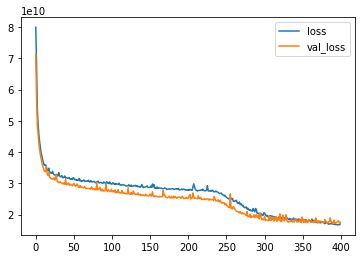

In [89]:
losses.plot()

In [0]:
from sklearn.metrics import   mean_absolute_error,mean_squared_error,explained_variance_score

In [0]:
prediction = model.predict(X_test)

In [92]:
mean_squared_error(y_test,prediction)

17537664115.36713

In [93]:
np.sqrt(mean_squared_error(y_test,prediction))

132429.8460142846

In [94]:
mean_absolute_error(y_test,prediction)

77582.9994695216

In [95]:
explained_variance_score(y_test,prediction)

0.869269709882835

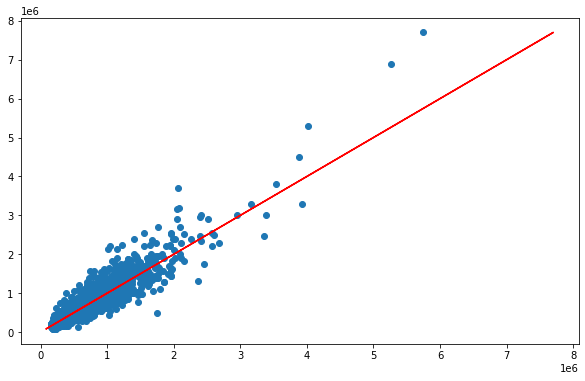

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(y=y_test,x=prediction)
plt.plot(y_test,y_test,'r')

In [0]:
single_house = df.drop(['price','date'],axis=1).iloc[0]


In [0]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [108]:
model.predict(single_house)

array([[248750.11]], dtype=float32)

In [109]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
